Problem 2

Training Neural Network
Epoch 0, Training Loss: 0.7166246771812439, Validation Loss: 0.7026201486587524
Epoch 100, Training Loss: 0.14906583726406097, Validation Loss: 0.18901625275611877
Epoch 200, Training Loss: 0.07772918045520782, Validation Loss: 0.11748867481946945
Epoch 300, Training Loss: 0.055978283286094666, Validation Loss: 0.09821396321058273
Epoch 400, Training Loss: 0.044636111706495285, Validation Loss: 0.0896223857998848
Epoch 500, Training Loss: 0.036926429718732834, Validation Loss: 0.0859537273645401
Epoch 600, Training Loss: 0.030769648030400276, Validation Loss: 0.08335946500301361
Epoch 700, Training Loss: 0.025643866509199142, Validation Loss: 0.08189355581998825
Epoch 800, Training Loss: 0.02137846127152443, Validation Loss: 0.08220433443784714
Epoch 900, Training Loss: 0.01774427480995655, Validation Loss: 0.0835338905453682
Epoch 999, Training Loss: 0.014867488294839859, Validation Loss: 0.08538972586393356
Total Training Time: 1.18 seconds
Validation Accuracy

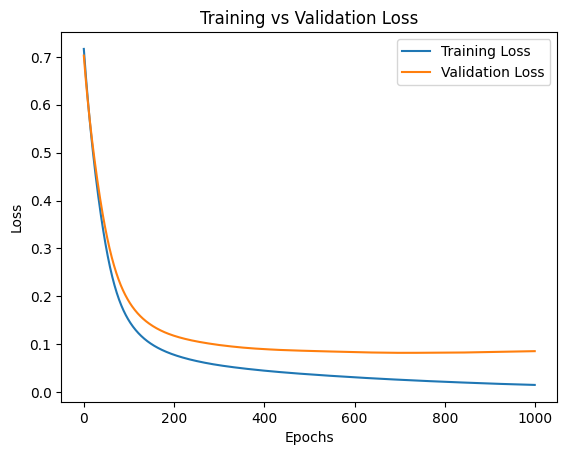

In [2]:
import numpy as np
import pandas as pd
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# Load the Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess and regularize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class CancerNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(CancerNN, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, 32)
        self.output = torch.nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

def train_nn_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = CancerNN(input_dim)
    criterion = torch.nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return model, training_loss, validation_loss, training_time

learning_rate = 0.001
epochs = 1000

print("Training Neural Network")
model, train_loss, val_loss, training_time = train_nn_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs)

print(f"Total Training Time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    y_val_pred_class = (y_val_pred >= 0.5).float()
    accuracy = accuracy_score(y_val_tensor.numpy(), y_val_pred_class.numpy())

print(f"Validation Accuracy: {accuracy:.4f}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation the Decision Matrix for Model Evaluation
y_true = y_val_tensor.numpy()
y_pred = y_val_pred_class.numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Validation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


--- Validation Metrics ---
Accuracy:  0.9561
Precision: 0.9855
Recall:    0.9444
F1 Score:  0.9645
